<a href="https://colab.research.google.com/github/gabriela-regueira/Python_Practicing/blob/main/CartasBaralho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística Descritiva com Cartas de Baralho

**Contexto:**

Considere um baralho comum, ou seja, um conjunto de **52 cartas**, divididas em **4 naipes** (espadas (♠), copas (♥), ouros (♦) e paus (♣)). Cada naipe possui 13 cartas (às, os números de 2 a 10, valete, dama e rei).

Para cada carta, atribuiremos uma **pontuação**, onde as cartas numeradas recebem pontuação igual ao número de cada uma delas. Às vale 1. Valete, Dama e Rei valem 10 cada.

Vamos embaralhar as cartas e retirar 3 delas. Anotando a soma da pontuação obtida. Em seguida, colocamos as cartas de volta ao deck e repetimos o procedimento 30 vezes.

Temos então um conjunto de 30 amostras aleatórias, com n=3.


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
baralho = pd.Series({'às':1,'dois':2,'três':3,'quatro':4,'cinco':5,'seis':6,'sete':7,'oito':8,'nove':9,'dez':10,'valete':10,'dama':10,'rei':10},name='Pontuação')
pontuacao=pd.DataFrame(data=baralho)

amostras = []
soma_amostras=[]
media_amostras=[]
count=0
while count<30:
    a = baralho.sample(n=3)
    soma = a.values.sum()
    media = a.values.mean()
    amostras.append(a)
    soma_amostras.append(soma)
    media_amostras.append(media)
    count += 1


**Explorando os dados:**

1.	Primeiro, vamos plotar um histograma que mostra a **frequência relativa** do valor de cada carta do baralho. 



In [74]:
pontuacao

,Pontuação
às,1
dois,2
três,3
quatro,4
cinco,5
seis,6
sete,7
oito,8
nove,9
dez,10


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'frequência relativa')

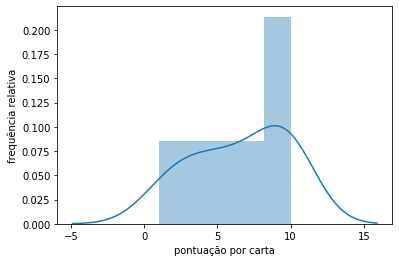

In [75]:
sns.distplot(pontuacao, bins=5)
plt.xlabel('pontuação por carta')
plt.ylabel('frequência relativa')

Vemos uma distribuição quase uniforme, com exceção da pontuação 10 que se repete para 3 tipos diferentes de cartas.

Outras métricas descritivas:




In [76]:
pontuacao.describe()

,Pontuação
count,13.000000
mean,6.538462
std,3.281651
min,1.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,10.000000


2. Plotando a distribuição das cartas obtidas das amostras:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


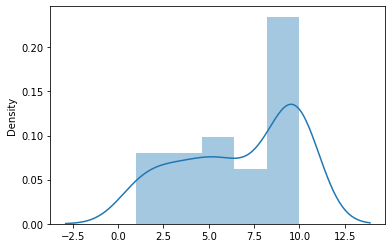

In [77]:
sns.distplot(amostras, bins=5)

Temos uma distribuição também assimétrica negativa. Ou seja, foram retiradas mais cartas com pontuação 10, do que as demais. Esse comportamento já era esperado, visto que temos mais cartas neste valor, a probabilidade de encontra-las nas amostras seria maior.

3.Plotando a distribuição da soma das cartas temos:


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


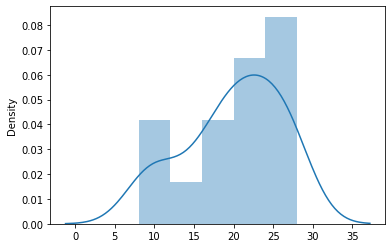

In [78]:
sns.distplot(soma_amostras, bins=5)

In [79]:
soma_df=pd.DataFrame(soma_amostras)
soma_df.describe()

,0
count,30.000000
mean,19.966667
std,6.065637
min,8.000000
25%,17.000000
50%,21.000000
75%,25.000000
max,28.000000


Temos uma distribuição da soma das amostras mais próxima de uma Distribuição Normal.

**Qual a probabilidade da amostra resultar num número acima de 20?**

Escolhendo o ponto 20, e calculando seu z-score, temos:


In [85]:
z_score = (20-19.966667)/6.065637
z_score

0.005495383254883032

De acordo com a Tabela Z, a probabilidade de se escolher o número 20 ou menor é de 51,99%. Portanto, para resultar num número ACIMA de 20, temos: 
100-51,99 = **48,01%**

Dentro de qual intervalo espera-se que 90% dos dados resultem?

Sabemos que 95% dos dados estão entre média-2sigma e média+2sigma. Ou seja, entre 2 desvios padrão para mais e para menos da média.

Para chegarmos em 90%, temos que 5% dos dados estarão em cada ponta da distribuição. Com isso, o intervalo de 90% estará entre um z-score de 95% e 5%;
- z-score(5%) = -1,65
- z-score(95%) = 1,65

z-score = (x - média)/desvio padrão

x = (z*desvio) + média

In [91]:
x1 = (-1.65*6.065637)+19.966667
x2 = (1.65*6.065637)+19.966667

print('Espera-se que 90% dos dados estejam entre', x1, 'e', x2)

Espera-se que 90% dos dados estejam entre 9.958365950000003 e 29.97496805


**Provando o Teorema do Limite Central**

Vamos plotar a distribuição das médias das amostras

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


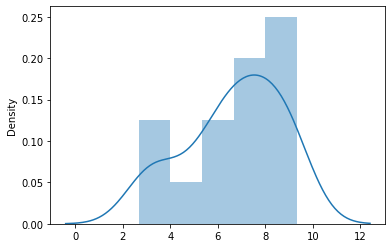

In [80]:
sns.distplot(media_amostras, bins=5)

In [81]:
indice = np.arange(1,31)
media_df=pd.DataFrame(media_amostras, index=indice)
media_df.describe()

,0
count,30.000000
mean,6.655556
std,2.021879
min,2.666667
25%,5.666667
50%,7.000000
75%,8.333333
max,9.333333


Notamos que:

1.   A distribuição das médias das amostras é próxima de uma Distribuição Normal
2.   A média da distribuição das médias é muito próxima da média da população (6,65 x 6,53)
3. O desvio da média das amostras é igual ao desvio padrão da população dividido pela raíz de n.



In [97]:
std_medias = 3.281651/np.sqrt(3)
std_medias

1.8946620882364047